In [ ]:
!pip install diffusers==0.10.2
!pip install transformers==4.25.1
!pip install accelerate==0.12.0
!pip install jax==0.3.25
!pip install jaxlib==0.3.25
!pip install torch
!pip install huggingface_hub==0.10.1

In [ ]:
!pip uninstall -y jax jaxlib
!pip install jax==0.3.25 jaxlib==0.3.25+cpu -f https://storage.googleapis.com/jax-releases/jax_releases.html


In [ ]:


from diffusers import StableDiffusionPipeline # Stable Diffusion model from the Hugging Face diffusers library

import torch

# Load the StableDiffusion model
model = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model, torch_dtype=torch.float32, revision="fp16",safety_checker=None)
# the pipeline is to streamline the process of loading, running, and managing the SD model. Providing a standardized way to perform image generation with SD
pipe.to("cuda")  # Use "cuda" if you have GPU access

# Function to generate image based on preference
def generate_image(description):
    image = pipe(description, num_inference_steps=10).images[0]
    # inference steps refer to the number of iterative computations the model performs to generate an image
    return image




# challenge: A lot of runtime is needed to generate an image so we decreased the no. of inference steps and set a lower
# resolution in the stable diffusion pipeline to reduce processing time considerably at the expense of image quality.
# Inference steps is the no. of iterative computations the model performs to generate an image


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/10 [00:00<?, ?it/s]

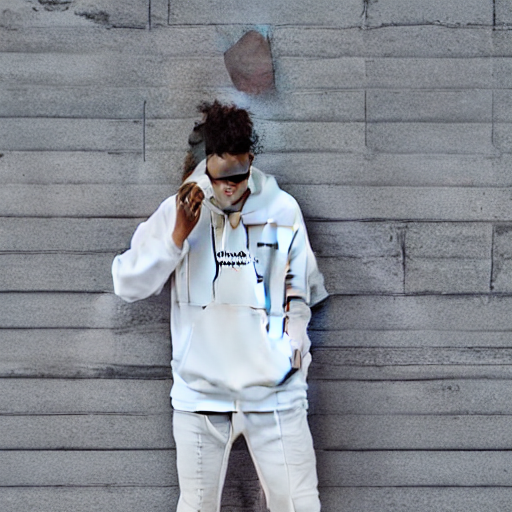

In [ ]:
from IPython.display import display

# Generate and display the image
image = generate_image("a person wearing a white hoodie")
display(image)

In [ ]:
import openai
import json
!pip install openai==0.28

openai.api_key = "your-api-key-here"

def generate_recommendation(prompt):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant for gift suggestions."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=150,
        temperature=0.7
    )
    return response.choices[0].message['content'].strip()

def get_gift_suggestion(recipient, occasion, budget):
    prompt = f"Suggest a gift for {recipient} for {occasion}. The budget is {budget}."
    return generate_recommendation(prompt)


recipient = "father"
occasion = "father's day"
budget = "$130"

gift_suggestion = get_gift_suggestion(recipient, occasion, budget)
print("Gift Suggestion:", gift_suggestion)
